## step 1: inspect collection

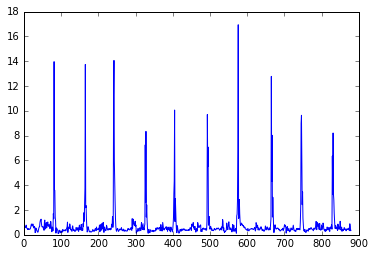

In [27]:
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dtw
%matplotlib inline

filepath = 'annotated_data/annotated_20141008_Snap_0_10_data.1412795610524.dj.txt.dat'
test_df = pd.read_csv(filepath, delimiter=',')
plt.plot(test_df['body_magnitude'])

## step 2: identify signature characteristics

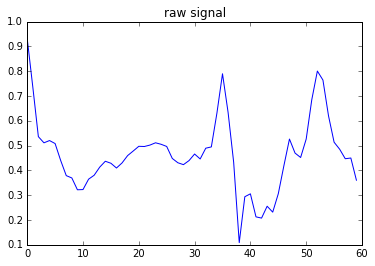

In [59]:
left_idx = 500
frame = tools.extract_window(test_df, left_idx, 60)
raw_signal = np.array(frame['magnitude'])
plt.plot(raw_signal)
plt.title('raw signal')

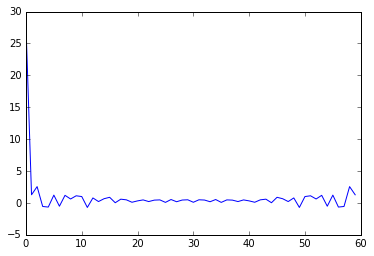

In [56]:
fft_of_signal = np.fft.fft(raw_signal)
plt.plot(fft_of_signal)

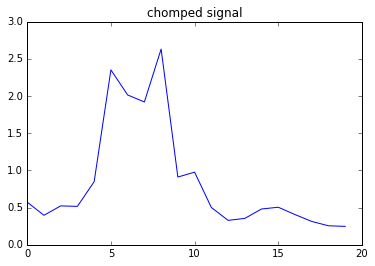

In [41]:
signal_chomped = raw_signal[20: 40]
plt.plot(signal_chomped)
plt.title('chomped signal')

In [42]:
stride = 5

rolling_data = pd.rolling_apply(signal_chomped, stride, lambda x: x[(stride - 1)] - x[0])

# events are marked by wide "swings" in jerk
jerk = max(rolling_data[(stride - 1):]) - min(rolling_data[(stride - 1):])

# events are also marked by consistent
area = np.trapz(rolling_data[(stride - 1):], dx=1)

print 'difference:', jerk, '| area: ', area

difference: 4.25770507372 | area:  -0.795274702949


In [61]:
from numpy.linalg import norm
from dtw import dtw

dist, cost, acc, path = dtw(reference.reshape(-1, 1), raw_signal.reshape(-1, 1), dist=norm)

print dist

0.280009808053


## step 3: simulate by slide through collection

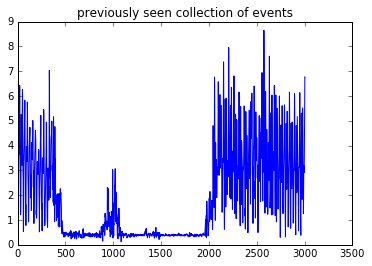

In [22]:
plt.plot(test_df['magnitude'])
plt.title('previously seen collection of events')

In [23]:
ls_frames, ls_df = tools.detect_events(100, test_df, 1, 0, 60)

identified event at  100
identified event at  178
identified event at  265
identified event at  343
identified event at  412
identified event at  940
identified event at  1018
identified event at  1087
identified event at  1993
identified event at  2062
identified event at  2140
identified event at  2227
identified event at  2305
identified event at  2392
identified event at  2461
identified event at  2548
identified event at  2617
identified event at  2704
identified event at  2782
identified event at  2860
identified event at  2938
number of events:  21


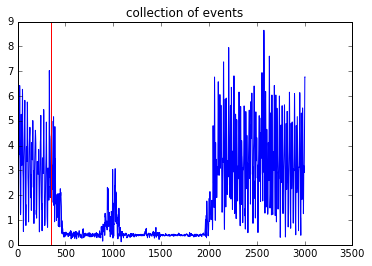

In [24]:
plt.plot(test_df['magnitude'])
plt.title('collection of events')
plt.axvline(349, color='red')